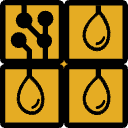

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split


## Loading and Splitting the Data

In [2]:
# Load dataset
GT = pd.read_csv("C:/Users/Omid/Desktop/MDTE/Challenge 2/DT/DATASETS/gt_full.csv")

# Seperating feature and label
Target = GT[['CO','NOX']]

Feature = GT.drop(columns=['CO','NOX',],axis=1)
Feature.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

In [3]:
Feature.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910


In [4]:
Target.head()

,CO,NOX
0,0.32663,81.952
1,0.44784,82.377
2,0.45144,83.776
3,0.23107,82.505
4,0.26747,82.028


In [5]:
X , X_test, Y, Y_test = train_test_split(Feature,Target, test_size=0.15, random_state = 42)

## Defining Boxplot Functions

In [6]:
def box_hist_plot_complete(df):
    for column in df.columns:
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
        sns.boxplot(x = df[column], ax=ax_box)
        sns.histplot(x = df[column], ax=ax_hist,bins=100,kde=True, legend=True)
        ax_box.set(xlabel='')
        #ax_hist.axvline(avg_df[column], color="b",ls ="--" )               #These parts can also be implemented
        #ax_hist.axvline(med_df[column], color="r",ls ="--" )
        #ax_hist.axvline(mode_df[column], color="k",ls ="--" )
        ax_hist.axvline(np.quantile(df[column],0.25), color="m",ls ="--" )
        ax_hist.axvline(np.quantile(df[column],0.75), color="m",ls ="--" )
        #ax_hist.legend("quantile")
        ax_hist.set_title(f"Histogram {column}")
        #sns.move_legend(ax_hist, "upper left", bbox_to_anchor=(1, 1))            #move the legend because the image space is smaller now.

        plt.show()
def box_hist_plot(df,column):
 
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
    sns.boxplot(x = df[column], ax=ax_box)
    sns.histplot(x = df[column], ax=ax_hist,bins=100,kde=True, legend=True)
    ax_box.set(xlabel='')
        #ax_hist.axvline(avg_df[column], color="b",ls ="--" )               #These parts can also be implemented
        #ax_hist.axvline(med_df[column], color="r",ls ="--" )
        #ax_hist.axvline(mode_df[column], color="k",ls ="--" )
    ax_hist.axvline(np.quantile(df[column],0.25), color="m",ls ="--" )
    ax_hist.axvline(np.quantile(df[column],0.75), color="m",ls ="--" )
    #ax_hist.legend("quantile")
    ax_hist.set_title(f"Histogram {column}")
        #sns.move_legend(ax_hist, "upper left", bbox_to_anchor=(1, 1))            #move the legend because the image space is smaller now.

    plt.show()

## Dropping Outliers

In [7]:
def outliers(data,target,cat):
    # Calculate Q1, Q3, and IQR
    Q1 = data[cat].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[cat].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_list = list(data[cat][(data[cat] < lower_bound) | (data[cat] > upper_bound)])

    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"outlier list is:",outliers_list)
    print(f"Number of Outliers:",len(outliers_list))

    # Identify indices of rows to keep
    valid_indices = data[(data[cat] >= lower_bound) & (data[cat] <= upper_bound)].index

    # Filter both features and target using valid indices
    data = data.loc[valid_indices]
    target = target.loc[valid_indices]
    return data
    

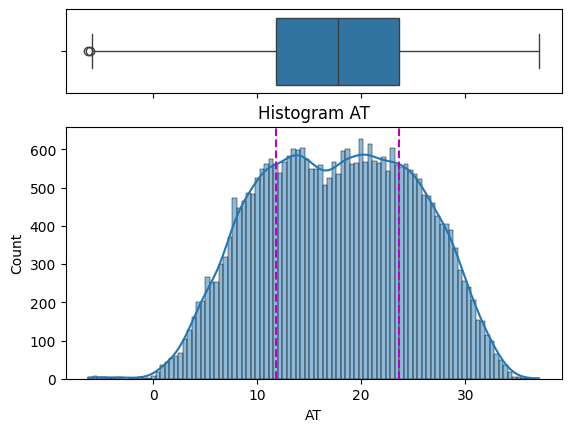

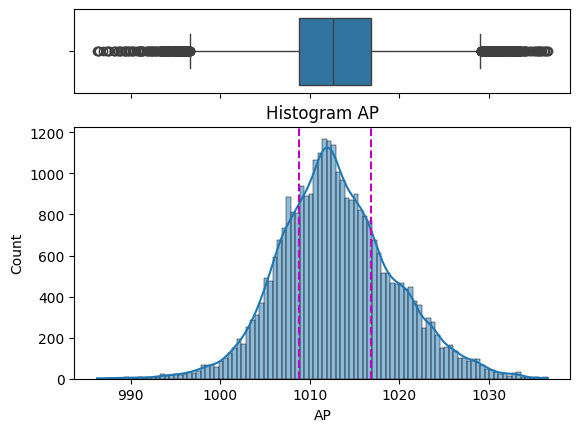

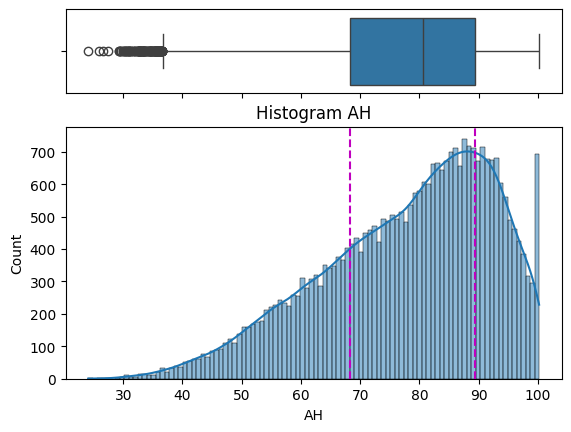

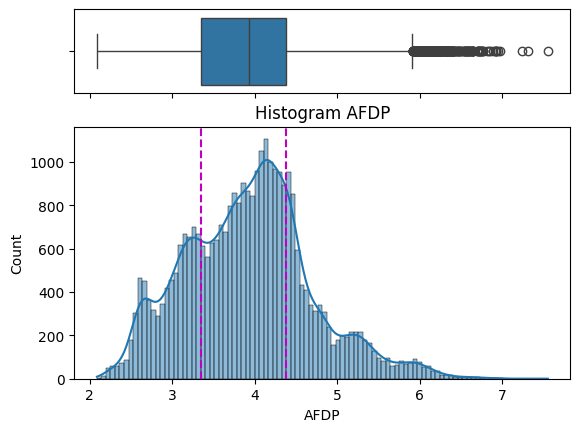

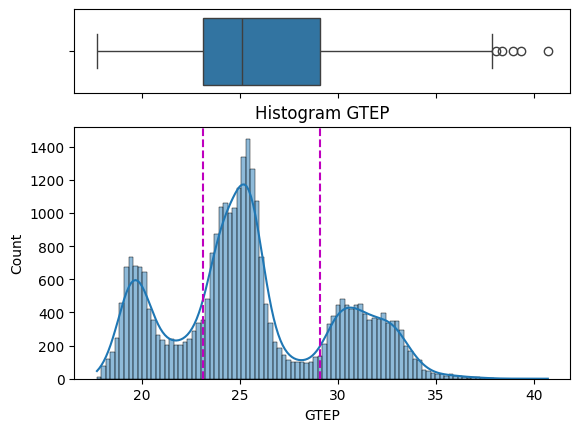

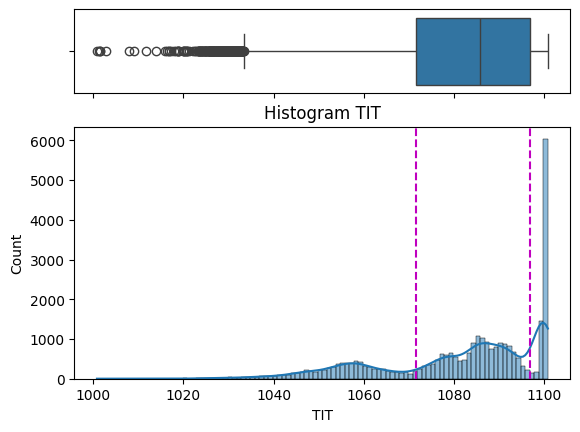

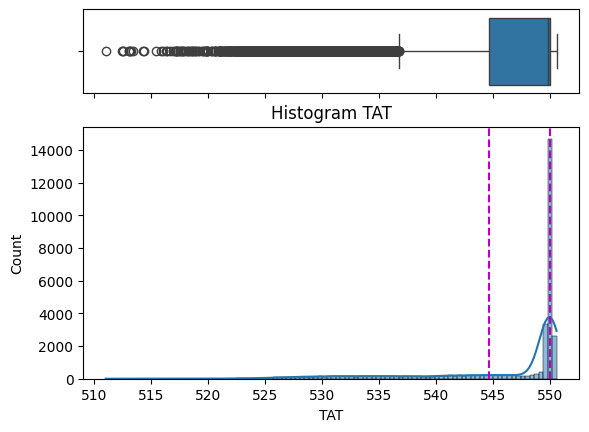

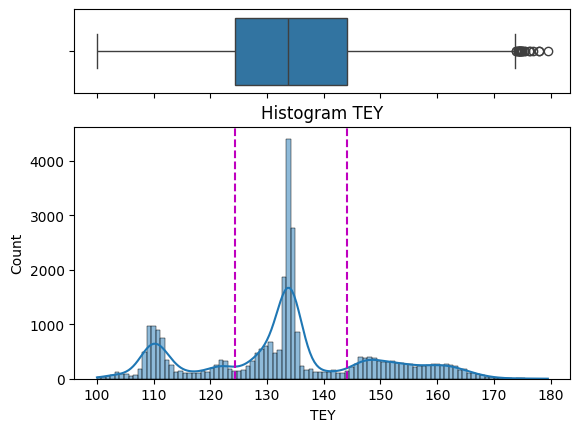

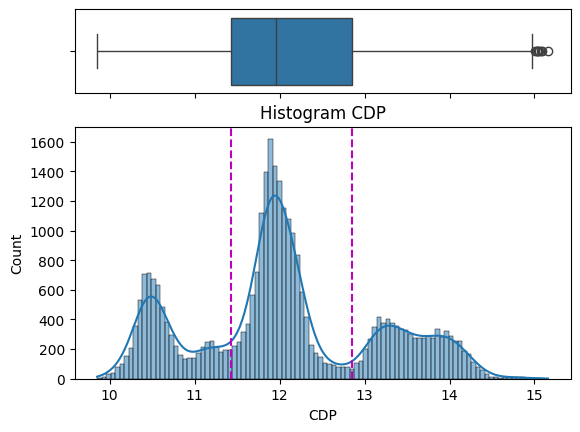

In [8]:
box_hist_plot_complete(X)

TEY

In [9]:
outliers(X,Y,'TEY')

Lower bound: 94.61749999999998
Upper bound: 173.75750000000002
outlier list is: [174.4, 174.39, 175.33, 177.91, 173.92, 174.63, 176.09, 174.25, 174.22, 174.34, 176.91, 175.01, 175.41, 174.61, 174.91, 174.88, 174.53, 173.94, 174.82, 176.35, 179.5, 177.88]
Number of Outliers: 22


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
8537,5.8946,1027.80,74.088,4.4051,23.658,1083.5,550.02,133.78,11.830
29199,15.7260,1017.10,56.171,3.7053,32.945,1100.1,542.88,151.83,13.374
5707,24.6300,1011.90,68.847,4.0278,25.674,1092.3,550.05,134.22,12.209
19735,30.4850,1014.90,55.335,3.8906,20.640,1061.7,550.00,110.13,10.765
10299,29.0360,1013.40,46.049,4.1492,25.690,1090.8,549.92,132.84,12.126
...,...,...,...,...,...,...,...,...,...
16850,17.4020,995.03,62.418,2.7386,19.878,1056.4,550.08,110.65,10.523
6265,14.3410,1018.80,88.657,3.9225,24.138,1087.0,550.03,133.71,11.891
11284,24.5690,1011.80,70.774,4.1297,25.681,1092.3,549.59,134.76,12.253
860,6.8058,1016.20,86.976,3.9773,23.863,1084.6,550.26,134.37,11.916


CDP

In [10]:
outliers(X,Y,'CDP')

Lower bound: 9.27825
Upper bound: 15.000250000000001
outlier list is: [15.043, 15.029, 15.002, 15.031, 15.055, 15.081, 15.159, 15.083]
Number of Outliers: 8


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
8537,5.8946,1027.80,74.088,4.4051,23.658,1083.5,550.02,133.78,11.830
29199,15.7260,1017.10,56.171,3.7053,32.945,1100.1,542.88,151.83,13.374
5707,24.6300,1011.90,68.847,4.0278,25.674,1092.3,550.05,134.22,12.209
19735,30.4850,1014.90,55.335,3.8906,20.640,1061.7,550.00,110.13,10.765
10299,29.0360,1013.40,46.049,4.1492,25.690,1090.8,549.92,132.84,12.126
...,...,...,...,...,...,...,...,...,...
16850,17.4020,995.03,62.418,2.7386,19.878,1056.4,550.08,110.65,10.523
6265,14.3410,1018.80,88.657,3.9225,24.138,1087.0,550.03,133.71,11.891
11284,24.5690,1011.80,70.774,4.1297,25.681,1092.3,549.59,134.76,12.253
860,6.8058,1016.20,86.976,3.9773,23.863,1084.6,550.26,134.37,11.916


AP

In [11]:
outliers(X,Y,'AP')

Lower bound: 996.6499999999999
Upper bound: 1029.05
outlier list is: [1031.7, 1030.1, 1030.5, 994.34, 1030.0, 987.5, 1030.8, 996.6, 1029.2, 993.51, 1030.3, 990.8, 1030.8, 1029.3, 1032.8, 1031.1, 1029.7, 1031.8, 1029.2, 987.31, 996.01, 1030.3, 1032.9, 995.28, 993.42, 1033.5, 996.28, 1033.0, 1030.1, 994.76, 992.89, 1030.1, 1033.5, 1032.8, 1029.2, 1032.1, 1033.2, 1029.5, 1034.6, 991.29, 991.03, 993.73, 987.43, 1029.3, 1029.5, 1030.5, 992.42, 995.9, 1031.9, 1033.0, 1030.4, 996.53, 1031.0, 1029.6, 989.67, 1030.4, 1029.3, 1031.8, 1033.2, 1030.5, 988.2, 1029.1, 1029.7, 1032.0, 1031.5, 1029.5, 1030.5, 993.79, 993.76, 990.64, 1035.2, 1029.3, 1033.1, 1033.3, 988.82, 994.76, 996.16, 994.07, 994.5, 1031.5, 1036.5, 995.4, 1033.3, 992.83, 1035.1, 1029.9, 1029.1, 993.37, 996.03, 988.65, 1029.2, 995.4, 1032.9, 996.4, 1029.2, 1033.2, 992.76, 1031.5, 994.99, 1029.9, 1031.2, 1033.1, 996.35, 1029.4, 996.34, 991.8, 1029.5, 989.38, 994.46, 1030.3, 990.22, 1030.5, 991.96, 1033.3, 1029.8, 1035.5, 1034.1, 1029

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
8537,5.8946,1027.8,74.088,4.4051,23.658,1083.5,550.02,133.78,11.830
29199,15.7260,1017.1,56.171,3.7053,32.945,1100.1,542.88,151.83,13.374
5707,24.6300,1011.9,68.847,4.0278,25.674,1092.3,550.05,134.22,12.209
19735,30.4850,1014.9,55.335,3.8906,20.640,1061.7,550.00,110.13,10.765
10299,29.0360,1013.4,46.049,4.1492,25.690,1090.8,549.92,132.84,12.126
...,...,...,...,...,...,...,...,...,...
21962,13.9170,1020.5,78.834,3.2631,24.973,1087.8,549.71,133.79,11.980
6265,14.3410,1018.8,88.657,3.9225,24.138,1087.0,550.03,133.71,11.891
11284,24.5690,1011.8,70.774,4.1297,25.681,1092.3,549.59,134.76,12.253
860,6.8058,1016.2,86.976,3.9773,23.863,1084.6,550.26,134.37,11.916


TIT

In [12]:
outliers(X,Y,'TIT')

Lower bound: 1033.4999999999998
Upper bound: 1135.1000000000001
outlier list is: [1009.0, 1030.1, 1031.5, 1020.6, 1018.0, 1027.8, 1028.7, 1029.6, 1022.9, 1032.6, 1030.2, 1025.9, 1028.4, 1030.0, 1027.0, 1016.7, 1032.0, 1030.2, 1021.3, 1027.9, 1030.0, 1024.6, 1032.2, 1029.0, 1025.0, 1032.6, 1027.6, 1033.0, 1033.4, 1023.4, 1027.8, 1030.1, 1016.4, 1032.0, 1031.1, 1027.8, 1032.8, 1030.8, 1025.7, 1026.1, 1007.9, 1028.2, 1028.1, 1032.3, 1030.4, 1011.7, 1029.7, 1029.8, 1028.6, 1032.2, 1025.6, 1027.4, 1026.5, 1023.3, 1020.1, 1025.2, 1029.3, 1016.7, 1032.7, 1030.7, 1026.7, 1025.8, 1026.8, 1026.3, 1026.4, 1031.6, 1027.4, 1031.4, 1020.6, 1030.9, 1028.4, 1028.2, 1026.4, 1030.6, 1031.3, 1033.1, 1028.9, 1029.4, 1028.0, 1025.9, 1033.2, 1030.9, 1030.7, 1026.6, 1029.5, 1032.9, 1030.4, 1026.8, 1033.3, 1026.4, 1033.2, 1032.0, 1030.8, 1023.4, 1023.5, 1031.5, 1029.0, 1023.5, 1026.4, 1028.8, 1028.2, 1030.4, 1031.5, 1020.2, 1002.9, 1025.9, 1026.6, 1024.7, 1032.5, 1030.0, 1001.3, 1033.1, 1024.4, 1030.2, 1026.1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
8537,5.8946,1027.80,74.088,4.4051,23.658,1083.5,550.02,133.78,11.830
29199,15.7260,1017.10,56.171,3.7053,32.945,1100.1,542.88,151.83,13.374
5707,24.6300,1011.90,68.847,4.0278,25.674,1092.3,550.05,134.22,12.209
19735,30.4850,1014.90,55.335,3.8906,20.640,1061.7,550.00,110.13,10.765
10299,29.0360,1013.40,46.049,4.1492,25.690,1090.8,549.92,132.84,12.126
...,...,...,...,...,...,...,...,...,...
16850,17.4020,995.03,62.418,2.7386,19.878,1056.4,550.08,110.65,10.523
6265,14.3410,1018.80,88.657,3.9225,24.138,1087.0,550.03,133.71,11.891
11284,24.5690,1011.80,70.774,4.1297,25.681,1092.3,549.59,134.76,12.253
860,6.8058,1016.20,86.976,3.9773,23.863,1084.6,550.26,134.37,11.916


TAT

In [13]:
outliers(X,Y,'TAT')

Lower bound: 536.7400000000001
Upper bound: 558.0199999999999
outlier list is: [530.69, 531.41, 529.15, 525.9, 527.34, 530.69, 531.77, 523.23, 528.35, 535.3, 536.47, 529.69, 534.17, 536.41, 534.79, 531.09, 533.19, 530.87, 530.33, 528.31, 534.65, 525.75, 535.44, 530.26, 530.81, 531.22, 531.91, 532.51, 534.92, 532.92, 527.31, 535.82, 528.57, 530.72, 531.61, 533.43, 528.03, 525.01, 529.68, 534.41, 522.81, 531.34, 535.68, 536.2, 527.93, 535.06, 535.63, 531.36, 531.8, 535.41, 524.03, 533.6, 526.47, 527.47, 531.27, 533.65, 531.93, 525.4, 532.67, 531.48, 525.97, 536.35, 528.96, 525.49, 529.6, 533.45, 519.63, 535.57, 534.5, 530.64, 534.71, 532.5, 531.82, 530.51, 525.99, 530.61, 536.24, 532.62, 535.3, 531.78, 536.74, 522.51, 527.99, 523.13, 528.63, 524.67, 528.13, 536.57, 536.54, 531.73, 526.53, 517.17, 534.13, 536.03, 532.41, 529.18, 535.92, 534.28, 535.87, 529.54, 532.43, 527.75, 532.46, 535.44, 529.82, 532.3, 527.25, 526.99, 529.4, 530.67, 533.27, 533.21, 535.06, 531.08, 536.56, 535.0, 529.2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
8537,5.8946,1027.80,74.088,4.4051,23.658,1083.5,550.02,133.78,11.830
29199,15.7260,1017.10,56.171,3.7053,32.945,1100.1,542.88,151.83,13.374
5707,24.6300,1011.90,68.847,4.0278,25.674,1092.3,550.05,134.22,12.209
19735,30.4850,1014.90,55.335,3.8906,20.640,1061.7,550.00,110.13,10.765
10299,29.0360,1013.40,46.049,4.1492,25.690,1090.8,549.92,132.84,12.126
...,...,...,...,...,...,...,...,...,...
16850,17.4020,995.03,62.418,2.7386,19.878,1056.4,550.08,110.65,10.523
6265,14.3410,1018.80,88.657,3.9225,24.138,1087.0,550.03,133.71,11.891
11284,24.5690,1011.80,70.774,4.1297,25.681,1092.3,549.59,134.76,12.253
860,6.8058,1016.20,86.976,3.9773,23.863,1084.6,550.26,134.37,11.916


In [14]:
Y_CO = Y['CO']
Y_NOX = Y['NOX']
Y_CO_test = Y_test['CO']
Y_NOX_test = Y_test['NOX']

In [15]:
from sklearn.preprocessing import MinMaxScaler
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)
X_test_scaled = Scaler.transform(X_test)
minmax = MinMaxScaler()
X__MinMax_scaked = minmax.fit_transform(X)
X_test_MinMax = minmax.transform(X_test)

In [16]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Input , Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.activations import relu
from tensorflow.keras import  regularizers

In [17]:
tf.__version__

'2.18.0'

In [18]:
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))


## First Attempt

In [26]:
ANN = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'relu'),
                  Dense(16,activation = 'relu'),
                  Dense(1)])
ANN.compile(optimizer='adam',loss='mse',metrics=[root_mean_squared_error])

In [27]:
ANN.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 865 (3.38 KB)

 Trainable params: 865 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
Model_1 = ANN.fit(X_scaled,Y_CO,epochs=100,batch_size=64,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])

Epoch 1/100


391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.9874 - root_mean_squared_error: 1.4005 - val_loss: 2.1126 - val_root_mean_squared_error: 0.7412
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.9702 - root_mean_squared_error: 0.7271 - val_loss: 1.7303 - val_root_mean_squared_error: 0.6687
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6532 - root_mean_squared_error: 0.6585 - val_loss: 1.6788 - val_root_mean_squared_error: 0.6501
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3552 - root_mean_squared_error: 0.6423 - val_loss: 1.6504 - val_root_mean_squared_error: 0.6536
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.8249 - root_mean_squared_error: 0.6628 - val_loss: 1.6358 - val_root_mean_squared_error: 0.6414
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3623 - root_mean_squared_error: 0.6327 - val_loss: 1.6865 - val_root_mean_squared_error: 0.6480
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - los

In [29]:
Model_1.history

{'loss': [3.347297430038452,
  1.7764207124710083,
  1.6477265357971191,
  1.6156048774719238,
  1.6052300930023193,
  1.5825872421264648,
  1.5731325149536133,
  1.5499945878982544,
  1.5435209274291992,
  1.5257489681243896,
  1.533521056175232,
  1.5128240585327148,
  1.495011806488037,
  1.4792287349700928,
  1.4793308973312378,
  1.4619919061660767,
  1.4525359869003296,
  1.4618947505950928,
  1.44691801071167,
  1.4262986183166504,
  1.4334770441055298,
  1.4133954048156738,
  1.4019227027893066,
  1.3820302486419678,
  1.3866770267486572,
  1.3780581951141357,
  1.363441824913025,
  1.3631819486618042,
  1.3545461893081665,
  1.3468315601348877,
  1.324749231338501,
  1.3401240110397339,
  1.3337520360946655,
  1.325685977935791,
  1.3265104293823242,
  1.3084447383880615,
  1.3032429218292236,
  1.3072091341018677,
  1.3100591897964478,
  1.3007198572158813,
  1.2861711978912354,
  1.2899253368377686,
  1.279771089553833,
  1.2800754308700562,
  1.2764430046081543,
  1.2673195

In [30]:
DF1 = pd.DataFrame(Model_1.history)
DF1

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,3.347297,0.999683,2.112629,0.741217
1,1.776421,0.696509,1.730316,0.668686
2,1.647727,0.662541,1.678826,0.650067
3,1.615605,0.652096,1.650361,0.653575
4,1.605230,0.649684,1.635811,0.641380
...,...,...,...,...
72,1.179604,0.556714,1.378914,0.574562
73,1.198348,0.559128,1.328839,0.570803
74,1.185355,0.553282,1.294963,0.566394
75,1.181520,0.555640,1.295926,0.575105


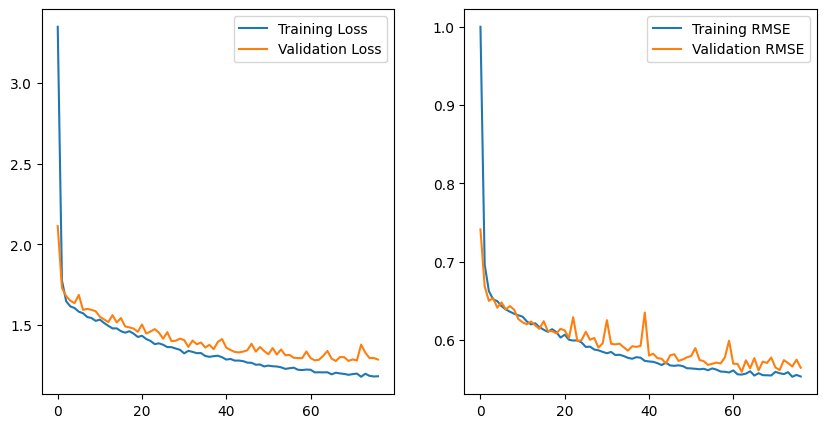

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF1['loss'],label='Training Loss')
plt.plot(DF1['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF1['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF1['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [32]:

Y_pred_CO=ANN.evaluate(X_test_scaled,Y_CO_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 1.8688 - root_mean_squared_error: 0.6010


## Making Batch Normalization for the layers

In [33]:
ANN_1 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'relu'),
                  keras.layers.BatchNormalization(),
                  Dense(16,activation = 'relu'),
                  Dense(1)])
ANN_1.compile(optimizer='adam',loss='mse',metrics=[root_mean_squared_error])

In [34]:
ANN_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 64 (256.00 B)

In [35]:
Model_2 = ANN_1.fit(X_scaled,Y_CO,epochs=100,batch_size=64,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5503 - root_mean_squared_error: 1.1632 - val_loss: 1.9620 - val_root_mean_squared_error: 0.7169
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6189 - root_mean_squared_error: 0.6866 - val_loss: 1.6254 - val_root_mean_squared_error: 0.6500
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5061 - root_mean_squared_error: 0.6783 - val_loss: 1.5625 - val_root_mean_squared_error: 0.6384
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5721 - root_mean_squared_error: 0.6622 - val_loss: 1.5719 - val_root_mean_squared_error: 0.6416
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6380 - root_mean_squared_error: 0.6661 - val_loss: 1.5011 - val_root_mean_squared_error: 0.6230
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5650 - root_mean_squared_error: 0.6535 - val_loss: 1.4994 - val_root_mean_squared_error: 0.6198
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

In [36]:
DF2 = pd.DataFrame(Model_2.history)
DF2

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,2.550645,0.885263,1.961981,0.716911
1,1.710846,0.696611,1.625448,0.650002
2,1.645593,0.678994,1.562530,0.638446
3,1.602294,0.664113,1.571898,0.641600
4,1.585538,0.665136,1.501136,0.623022
...,...,...,...,...
67,1.196757,0.575773,1.231516,0.556347
68,1.210840,0.583726,1.236304,0.555916
69,1.208878,0.579140,1.232217,0.573108
70,1.183603,0.576380,1.251780,0.565628


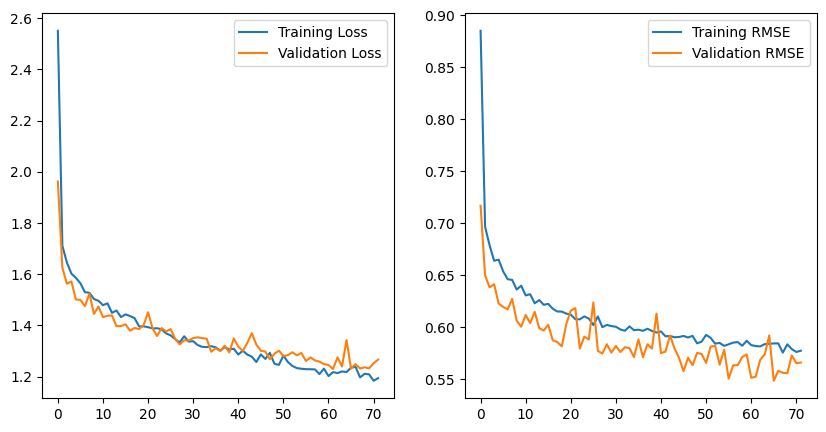

In [53]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF2['loss'],label='Training Loss')
plt.plot(DF2['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF2['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF2['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [49]:
ANN_1.evaluate(X_test_scaled,Y_CO_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 1.6856 - root_mean_squared_error: 0.5972


[1.2549647092819214, 0.5714511275291443]

## With Dropout

In [38]:
from keras.layers import Dropout

In [39]:
ANN_2 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'relu'),
                  keras.layers.BatchNormalization(),
                  Dense(16,activation = 'relu'),
                  keras.layers.Dropout(0.4),
                  Dense(1)])
ANN_2.compile(optimizer='adam',loss='mse',metrics=[root_mean_squared_error])

In [40]:
ANN_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 64 (256.00 B)

In [41]:
Model_3 = ANN_2.fit(X_scaled,Y_CO,epochs=100,batch_size=64,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5675 - root_mean_squared_error: 1.4135 - val_loss: 2.0588 - val_root_mean_squared_error: 0.7554
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3248 - root_mean_squared_error: 0.9445 - val_loss: 1.7429 - val_root_mean_squared_error: 0.6852
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3454 - root_mean_squared_error: 0.8987 - val_loss: 1.6721 - val_root_mean_squared_error: 0.6690
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1384 - root_mean_squared_error: 0.8470 - val_loss: 1.6455 - val_root_mean_squared_error: 0.6498
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.0823 - root_mean_squared_error: 0.8083 - val_loss: 1.6089 - val_root_mean_squared_error: 0.6457
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.9958 - root_mean_squared_error: 0.7892 - val_loss: 1.6080 - val_root_mean_squared_error: 0.6489
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

In [42]:
DF3 = pd.DataFrame(Model_3.history)
DF3

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,3.630440,1.191546,2.058809,0.755395
1,2.528759,0.936303,1.742948,0.685233
2,2.357124,0.880676,1.672127,0.669027
3,2.194712,0.841179,1.645533,0.649799
4,2.102811,0.808685,1.608871,0.645695
5,2.033980,0.777986,1.608013,0.648883
6,2.061185,0.772642,1.608119,0.647782
7,1.976740,0.749585,1.579587,0.641745
8,1.951606,0.740329,1.599357,0.640173
9,1.888345,0.734347,1.588116,0.643440


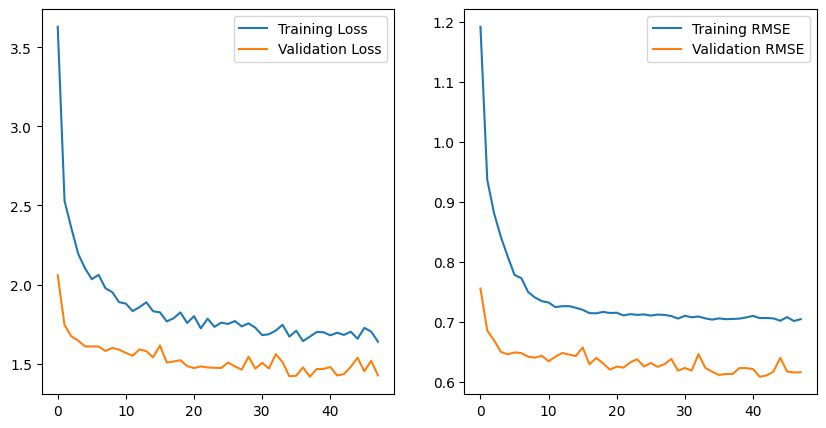

In [52]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF3['loss'],label='Training Loss')
plt.plot(DF3['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF3['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF3['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [50]:
ANN_2.evaluate(X_test_scaled,Y_CO_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 1.9364 - root_mean_squared_error: 0.6445


[1.3852466344833374, 0.6083363890647888]

## Increasing Batch size

In [44]:
ANN_3 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'relu'),
                  keras.layers.BatchNormalization(),
                  Dense(16,activation = 'relu'),
                  keras.layers.Dropout(0.4),
                  Dense(1)])
ANN_3.compile(optimizer='adam',loss='mse',metrics=[root_mean_squared_error])

In [45]:
Model_4 = ANN_3.fit(X_scaled,Y_CO,epochs=100,batch_size=128,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0673 - root_mean_squared_error: 2.0337 - val_loss: 3.3543 - val_root_mean_squared_error: 1.0353
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5343 - root_mean_squared_error: 1.1303 - val_loss: 2.0817 - val_root_mean_squared_error: 0.7618
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6708 - root_mean_squared_error: 1.0027 - val_loss: 1.7948 - val_root_mean_squared_error: 0.7004
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6063 - root_mean_squared_error: 0.9542 - val_loss: 1.8070 - val_root_mean_squared_error: 0.6917
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3057 - root_mean_squared_error: 0.9196 - val_loss: 1.8256 - val_root_mean_squared_error: 0.6963
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9608 - root_mean_squared_error: 0.9314 - val_loss: 1.8116 - val_root_mean_squared_error: 0.6838
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [46]:
DF4 = pd.DataFrame(Model_4.history)
DF4

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,5.787838,1.594526,3.354329,1.035281
1,3.170918,1.081522,2.081719,0.761777
2,2.783500,0.993921,1.794754,0.700397
3,2.669726,0.955238,1.806979,0.691680
4,2.554902,0.923195,1.825593,0.696254
5,2.595818,0.907736,1.811637,0.683803
6,2.530559,0.882583,1.786505,0.678150
7,2.446668,0.858735,1.766632,0.681796
8,2.328140,0.834548,1.701987,0.661921
9,2.265372,0.819900,1.661713,0.654787


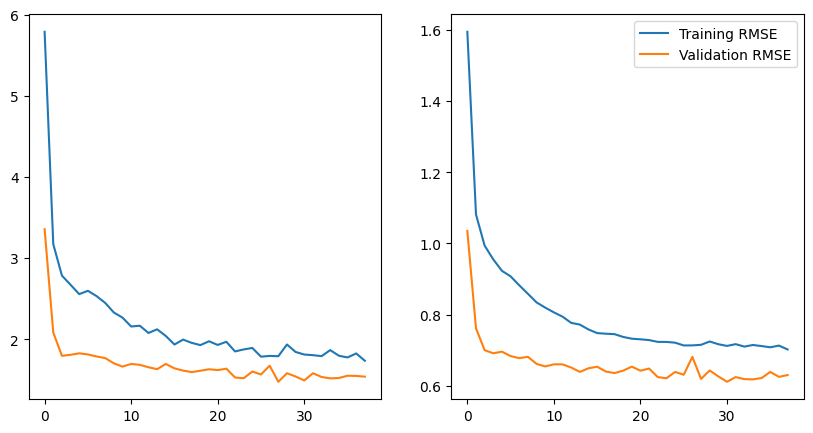

In [47]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF4['loss'],label='Training Loss')
plt.plot(DF4['val_loss'],label='Validation Loss')
plt.subplot(1,2,2)
plt.plot(DF4['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF4['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [51]:
ANN_3.evaluate(X_test_scaled,Y_CO_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 2.2512 - root_mean_squared_error: 0.6636


[1.5251429080963135, 0.6255775094032288]

## Using elu as an activation 

In [19]:
ANN_4 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu'),
                  keras.layers.BatchNormalization(),
                  Dense(16,activation = 'elu'),
                  keras.layers.Dropout(0.4),
                  Dense(1)])
ANN_4.compile(optimizer='adam',loss='mse',metrics=[root_mean_squared_error])


In [20]:
Model_5 = ANN_4.fit(X_scaled,Y_CO,epochs=100,batch_size=128,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.3222 - root_mean_squared_error: 1.8603 - val_loss: 2.5330 - val_root_mean_squared_error: 0.8205
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6987 - root_mean_squared_error: 1.0364 - val_loss: 2.1723 - val_root_mean_squared_error: 0.7800
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1230 - root_mean_squared_error: 0.9079 - val_loss: 1.9978 - val_root_mean_squared_error: 0.7410
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3327 - root_mean_squared_error: 0.8867 - val_loss: 1.9088 - val_root_mean_squared_error: 0.7048
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2758 - root_mean_squared_error: 0.8637 - val_loss: 1.8528 - val_root_mean_squared_error: 0.6842
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9562 - root_mean_squared_error: 0.8227 - val_loss: 1.7737 - val_root_mean_squared_error: 0.6727
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [22]:
DF5 = pd.DataFrame(Model_5.history)
DF5

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,5.018858,1.509095,2.532977,0.820538
1,2.698483,1.003493,2.172347,0.779998
2,2.402261,0.910658,1.997761,0.740970
3,2.296043,0.875674,1.908801,0.704816
4,2.171143,0.849429,1.852846,0.684178
...,...,...,...,...
74,1.731007,0.716877,1.555290,0.623831
75,1.705643,0.715308,1.556767,0.651344
76,1.709302,0.722881,1.558532,0.637587
77,1.723052,0.711636,1.562476,0.639071


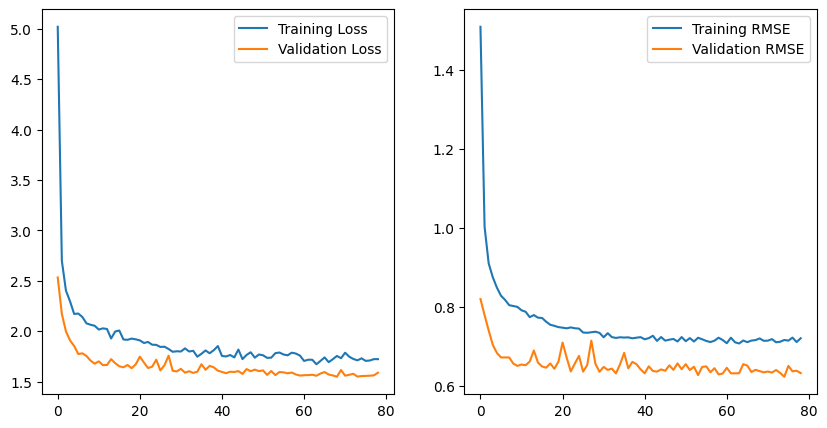

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF5['loss'],label='Training Loss')
plt.plot(DF5['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF5['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF5['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [25]:

ANN_4.evaluate(X_test_scaled,Y_CO_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 2.3528 - root_mean_squared_error: 0.6758


[1.632246732711792, 0.6400159597396851]

## Changing Optimizer - Learning rate - Batch size

In [19]:
ANN_5 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu'),
                  Dense(16,activation = 'elu'),
                  keras.layers.Dropout(0.2),
                  Dense(1)])
ANN_5.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01),loss='mse',metrics=[root_mean_squared_error])


In [20]:
Model_6 = ANN_5.fit(X_scaled,Y_CO,epochs=100,batch_size=64,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])

Epoch 1/100


391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.6878 - root_mean_squared_error: 0.9411 - val_loss: 1.9161 - val_root_mean_squared_error: 0.6972
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8129 - root_mean_squared_error: 0.7569 - val_loss: 1.7619 - val_root_mean_squared_error: 0.6762
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.8187 - root_mean_squared_error: 0.7223 - val_loss: 1.7385 - val_root_mean_squared_error: 0.6764
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6804 - root_mean_squared_error: 0.6963 - val_loss: 1.6236 - val_root_mean_squared_error: 0.6551
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7641 - root_mean_squared_error: 0.7020 - val_loss: 1.6604 - val_root_mean_squared_error: 0.6350
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6667 - root_mean_squared_error: 0.6948 - val_loss: 1.5932 - val_root_mean_squared_error: 0.6404
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - los

In [21]:
DF6 = pd.DataFrame(Model_6.history)
DF6

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,2.224503,0.840541,1.916078,0.697212
1,1.896085,0.755820,1.761948,0.676167
2,1.824133,0.722590,1.738454,0.676419
3,1.775298,0.709050,1.623610,0.655109
4,1.716867,0.702286,1.660388,0.635033
5,1.677174,0.690286,1.593231,0.640354
6,1.706927,0.693299,1.773609,0.697832
7,1.673759,0.692459,1.861252,0.718464
8,1.685663,0.683938,1.555285,0.661301
9,1.658249,0.683603,1.535245,0.640074


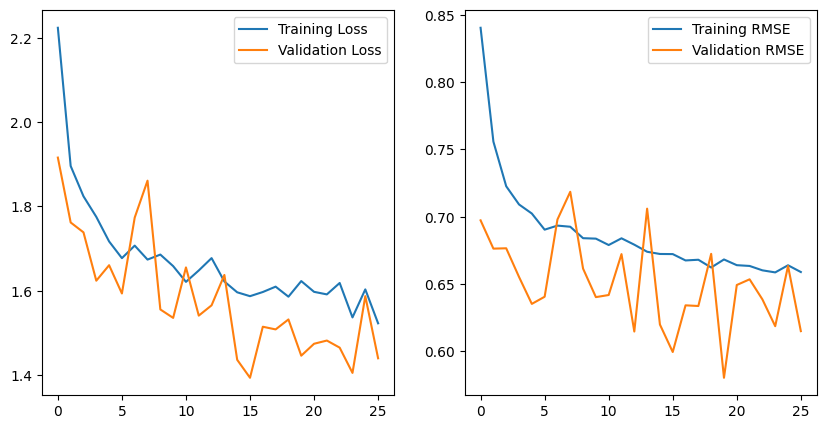

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF6['loss'],label='Training Loss')
plt.plot(DF6['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF6['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF6['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [23]:
ANN_5.evaluate(X_test_scaled,Y_CO_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 1.9987 - root_mean_squared_error: 0.6432


[1.4277297258377075, 0.6123231649398804]

## Adding changing Learning rates

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.6032 - root_mean_squared_error: 1.2849 - val_loss: 2.0120 - val_root_mean_squared_error: 0.7483
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 2.3002 - root_mean_squared_error: 0.8141 - val_loss: 2.0172 - val_root_mean_squared_error: 0.7242
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9625 - root_mean_squared_error: 0.7567 - val_loss: 1.7795 - val_root_mean_squared_error: 0.6751
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8648 - root_mean_squared_error: 0.7413 - val_loss: 1.8115 - val_root_mean_squared_error: 0.6868
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6394 - root_mean_squared_error: 0.7312 - val_loss: 1.7484 - val_root_mean_squared_error: 0.6692
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8472 - root_mean_squared_error: 0.7253 - val_loss: 1.8255 - val_root_mean_squared_error: 0.6958
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 

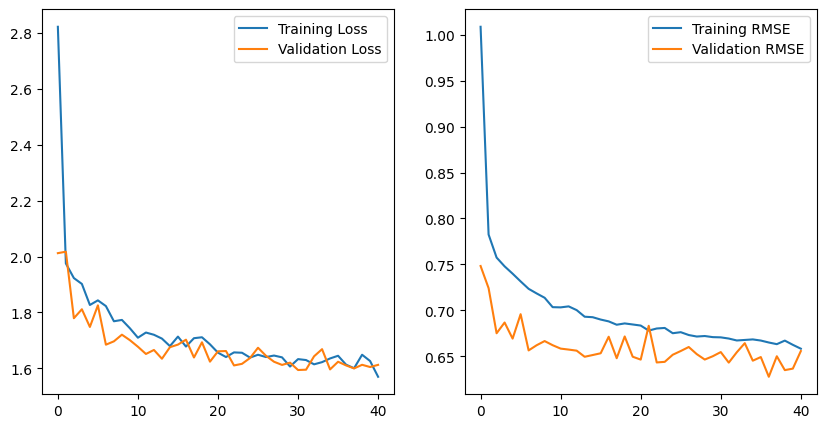

In [24]:
ANN_6 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu'),
                  Dense(16,activation = 'elu'),
                  keras.layers.Dropout(0.2),
                  Dense(1)])
ANN_6.compile(optimizer=keras.optimizers.RMSprop(),loss='mse',metrics=[root_mean_squared_error])
Model_7 = ANN_6.fit(X_scaled,Y_CO,epochs=100,batch_size=64,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])
DF7 = pd.DataFrame(Model_7.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF7['loss'],label='Training Loss')
plt.plot(DF7['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF7['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF7['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [25]:
ANN_6.evaluate(X_test_scaled,Y_CO_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 2.3401 - root_mean_squared_error: 0.6924


[1.6624269485473633, 0.6574811339378357]

## Changing the regularization

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.4666 - root_mean_squared_error: 1.3259 - val_loss: 2.0260 - val_root_mean_squared_error: 0.7165
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0229 - root_mean_squared_error: 0.8045 - val_loss: 1.9444 - val_root_mean_squared_error: 0.7381
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0429 - root_mean_squared_error: 0.7713 - val_loss: 1.8302 - val_root_mean_squared_error: 0.6792
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8091 - root_mean_squared_error: 0.7442 - val_loss: 1.7762 - val_root_mean_squared_error: 0.6646
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7287 - root_mean_squared_error: 0.7356 - val_loss: 1.7364 - val_root_mean_squared_error: 0.6665
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1887 - root_mean_squared_error: 0.7444 - val_loss: 1.7440 - val_root_mean_squared_error: 0.6765
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2m

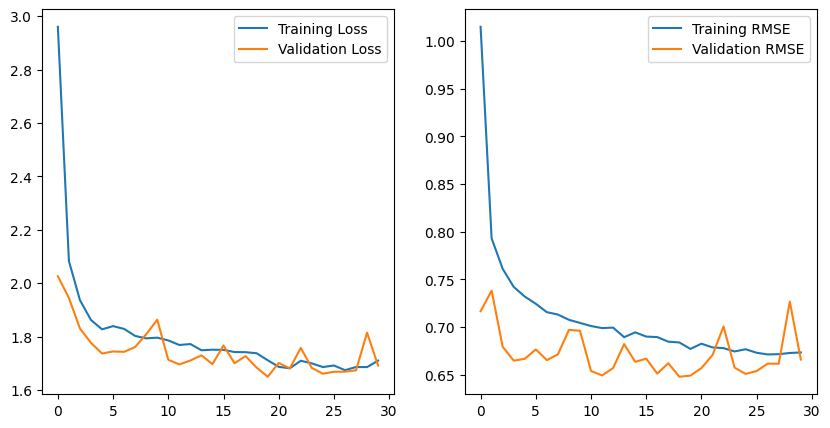

In [ ]:

ANN_7 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  keras.layers.Dropout(0.2),
                  Dense(1)])
ANN_7.compile(optimizer=keras.optimizers.RMSprop(),loss='mse',metrics=[root_mean_squared_error])
Model_8 = ANN_7.fit(X_scaled,Y_CO,epochs=100,batch_size=64,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])
DF8 = pd.DataFrame(Model_8.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF8['loss'],label='Training Loss')
plt.plot(DF8['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF8['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF8['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()


## With regularizartion and no dropout

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.0658 - root_mean_squared_error: 1.1867 - val_loss: 1.9979 - val_root_mean_squared_error: 0.6977
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9628 - root_mean_squared_error: 0.7084 - val_loss: 1.8345 - val_root_mean_squared_error: 0.6836
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6395 - root_mean_squared_error: 0.6741 - val_loss: 1.8319 - val_root_mean_squared_error: 0.6895
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7074 - root_mean_squared_error: 0.6718 - val_loss: 1.8090 - val_root_mean_squared_error: 0.6902
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6487 - root_mean_squared_error: 0.6729 - val_loss: 1.8047 - val_root_mean_squared_error: 0.6766
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7121 - root_mean_squared_error: 0.6668 - val_loss: 1.7465 - val_root_mean_squared_error: 0.6672
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

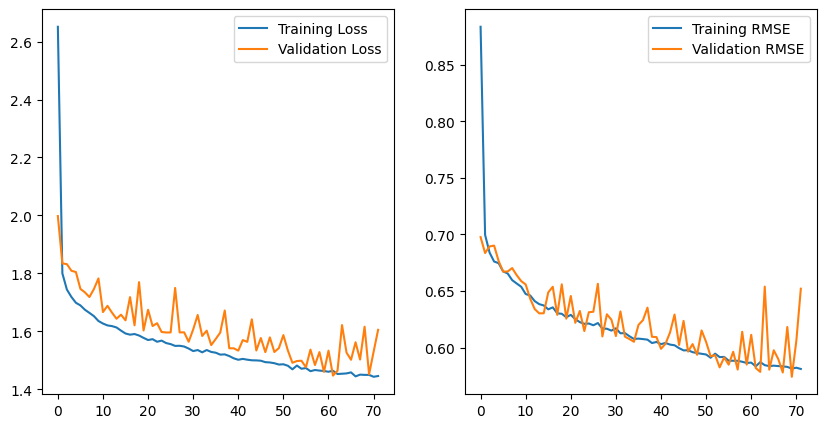

In [28]:
ANN_8 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dense(1)])
ANN_8.compile(optimizer=keras.optimizers.RMSprop(),loss='mse',metrics=[root_mean_squared_error])
Model_9 = ANN_8.fit(X_scaled,Y_CO,epochs=100,batch_size=64,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])
DF9 = pd.DataFrame(Model_9.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF9['loss'],label='Training Loss')
plt.plot(DF9['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF9['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF9['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.6275 - root_mean_squared_error: 1.4813 - val_loss: 2.2114 - val_root_mean_squared_error: 0.7571
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3474 - root_mean_squared_error: 0.8754 - val_loss: 2.0891 - val_root_mean_squared_error: 0.7438
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0149 - root_mean_squared_error: 0.8211 - val_loss: 1.8980 - val_root_mean_squared_error: 0.6957
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.8646 - root_mean_squared_error: 0.7734 - val_loss: 1.8332 - val_root_mean_squared_error: 0.6953
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.9920 - root_mean_squared_error: 0.7663 - val_loss: 1.8560 - val_root_mean_squared_error: 0.6911
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.9532 - root_mean_squared_error: 0.7528 - val_loss: 1.7983 - val_root_mean_squared_error: 0.6755
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

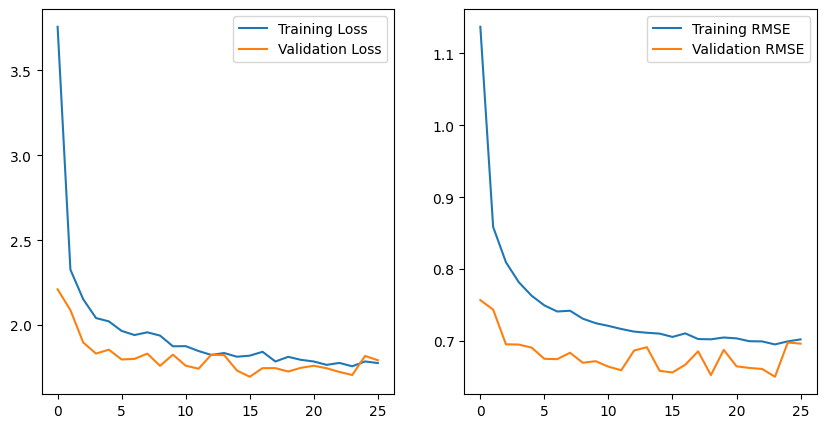

In [30]:
ANN_9 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.4),
                  Dense(1)])
ANN_9.compile(optimizer=keras.optimizers.RMSprop(),loss='mse',metrics=[root_mean_squared_error])
Model_10 = ANN_9.fit(X_scaled,Y_CO,epochs=100,batch_size=64,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])
DF10 = pd.DataFrame(Model_10.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF10['loss'],label='Training Loss')
plt.plot(DF10['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF10['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF10['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.5574 - root_mean_squared_error: 1.7069 - val_loss: 2.6082 - val_root_mean_squared_error: 0.8416
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0506 - root_mean_squared_error: 1.0225 - val_loss: 2.4595 - val_root_mean_squared_error: 0.7969
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9016 - root_mean_squared_error: 0.9596 - val_loss: 2.2901 - val_root_mean_squared_error: 0.7818
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4334 - root_mean_squared_error: 0.9240 - val_loss: 2.2617 - val_root_mean_squared_error: 0.7690
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6145 - root_mean_squared_error: 0.9078 - val_loss: 2.1590 - val_root_mean_squared_error: 0.7428
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.7558 - root_mean_squared_error: 0.9033 - val_loss: 2.1255 - val_root_mean_squared_error: 0.7396
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

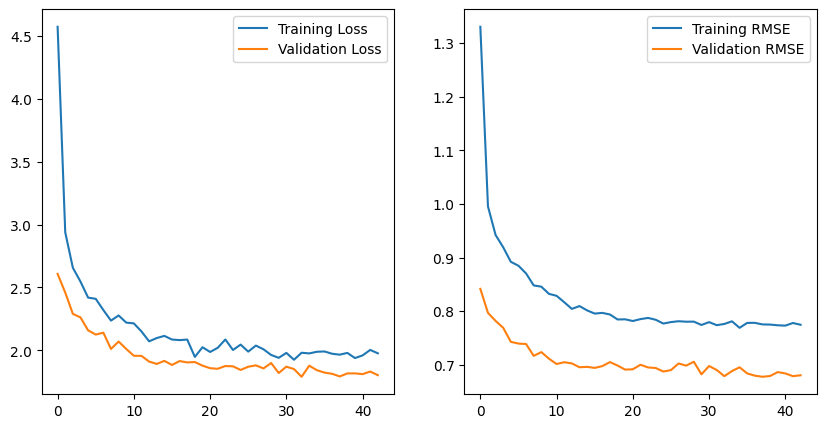

In [34]:
ANN_10 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.4),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.4),
                  Dense(1)])
ANN_10.compile(optimizer=keras.optimizers.RMSprop(),loss='mse',metrics=[root_mean_squared_error])
Model_11 = ANN_10.fit(X_scaled,Y_CO,epochs=100,batch_size=64,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])
DF11 = pd.DataFrame(Model_11.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF11['loss'],label='Training Loss')
plt.plot(DF11['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF11['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF11['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.9191 - root_mean_squared_error: 1.6266 - val_loss: 2.5523 - val_root_mean_squared_error: 0.8238
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.8993 - root_mean_squared_error: 1.0303 - val_loss: 2.4138 - val_root_mean_squared_error: 0.8426
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8193 - root_mean_squared_error: 0.9994 - val_loss: 2.3829 - val_root_mean_squared_error: 0.7927
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5557 - root_mean_squared_error: 0.9460 - val_loss: 2.2500 - val_root_mean_squared_error: 0.7820
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4377 - root_mean_squared_error: 0.9447 - val_loss: 2.2417 - val_root_mean_squared_error: 0.7697
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5982 - root_mean_squared_error: 0.9227 - val_loss: 2.1212 - val_root_mean_squared_error: 0.7654
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2m

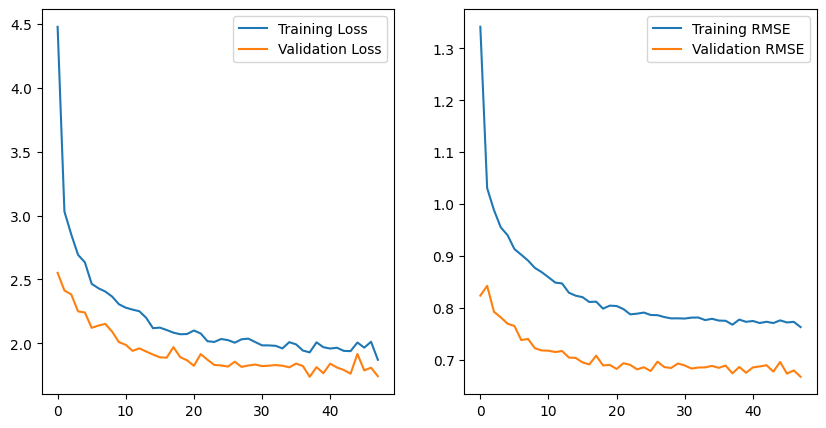

In [35]:
ANN_11 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.4),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.4),
                  Dense(1)])
ANN_11.compile(optimizer=keras.optimizers.Adam(),loss='mse',metrics=[root_mean_squared_error])
Model_12 = ANN_11.fit(X_scaled,Y_CO,epochs=100,batch_size=64,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])
DF12 = pd.DataFrame(Model_12.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF12['loss'],label='Training Loss')
plt.plot(DF12['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF12['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF12['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.3920 - root_mean_squared_error: 1.7726 - val_loss: 2.7212 - val_root_mean_squared_error: 0.8453
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1498 - root_mean_squared_error: 1.0601 - val_loss: 2.5651 - val_root_mean_squared_error: 0.8128
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.8254 - root_mean_squared_error: 0.9877 - val_loss: 2.4081 - val_root_mean_squared_error: 0.7897
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1538 - root_mean_squared_error: 0.9686 - val_loss: 2.2914 - val_root_mean_squared_error: 0.7637
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7523 - root_mean_squared_error: 0.9334 - val_loss: 2.2541 - val_root_mean_squared_error: 0.7607
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5640 - root_mean_squared_error: 0.9002 - val_loss: 2.2069 - val_root_mean_squared_error: 0.7441
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2m

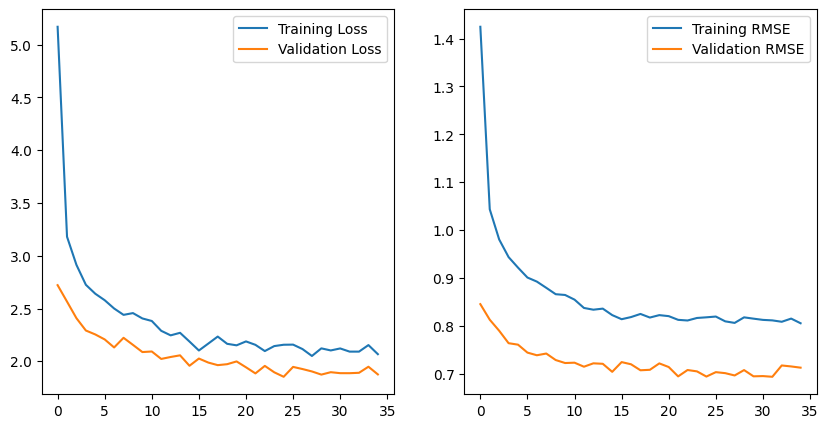

In [36]:
ANN_12 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(1)])
ANN_12.compile(optimizer=keras.optimizers.RMSprop(),loss='mse',metrics=[root_mean_squared_error])
Model_13 = ANN_12.fit(X_scaled,Y_CO,epochs=100,batch_size=64,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])
DF13 = pd.DataFrame(Model_13.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF13['loss'],label='Training Loss')
plt.plot(DF13['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF13['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF13['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.3040 - root_mean_squared_error: 1.8321 - val_loss: 2.5869 - val_root_mean_squared_error: 0.8407
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.4656 - root_mean_squared_error: 1.1333 - val_loss: 2.4402 - val_root_mean_squared_error: 0.8257
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9399 - root_mean_squared_error: 1.0193 - val_loss: 2.3873 - val_root_mean_squared_error: 0.8159
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0379 - root_mean_squared_error: 1.0110 - val_loss: 2.3238 - val_root_mean_squared_error: 0.8027
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9085 - root_mean_squared_error: 0.9846 - val_loss: 2.2895 - val_root_mean_squared_error: 0.7847
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5977 - root_mean_squared_error: 0.9420 - val_loss: 2.2771 - val_root_mean_squared_error: 0.7701
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

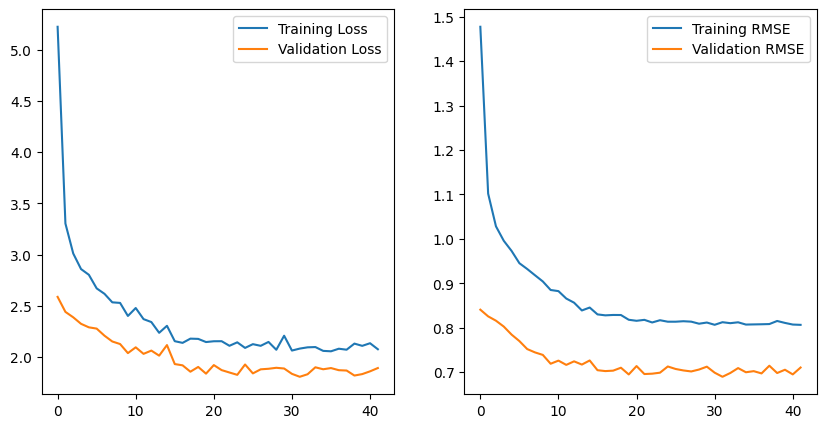

In [37]:
ANN_13 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(1)])
ANN_13.compile(optimizer=keras.optimizers.Adam(),loss='mse',metrics=[root_mean_squared_error])
Model_14 = ANN_13.fit(X_scaled,Y_CO,epochs=100,batch_size=64,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])
DF14 = pd.DataFrame(Model_14.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF14['loss'],label='Training Loss')
plt.plot(DF14['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF14['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF14['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2508 - root_mean_squared_error: 1.9904 - val_loss: 2.8936 - val_root_mean_squared_error: 0.8855
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.1480 - root_mean_squared_error: 1.2805 - val_loss: 2.6153 - val_root_mean_squared_error: 0.8597
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6679 - root_mean_squared_error: 1.1483 - val_loss: 2.5795 - val_root_mean_squared_error: 0.8494
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3841 - root_mean_squared_error: 1.0951 - val_loss: 2.5848 - val_root_mean_squared_error: 0.8388
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1831 - root_mean_squared_error: 1.0415 - val_loss: 2.4957 - val_root_mean_squared_error: 0.8287
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1113 - root_mean_squared_error: 1.0355 - val_loss: 2.4413 - val_root_mean_squared_error: 0.8171
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

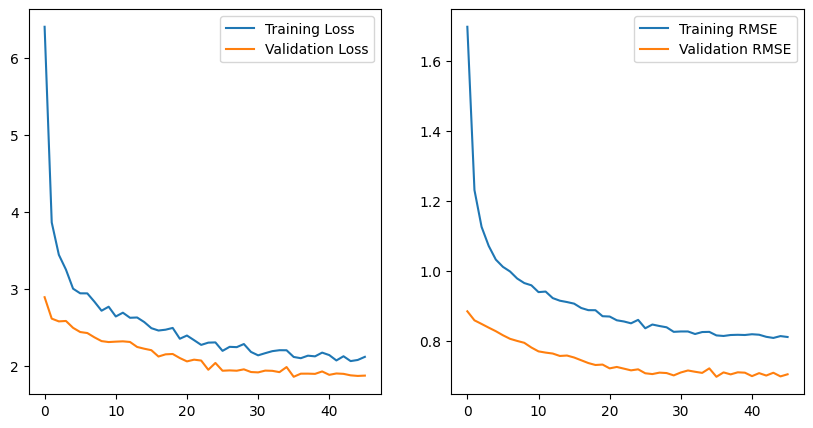

In [38]:
ANN_14 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(1)])
ANN_14.compile(optimizer=keras.optimizers.Adam(),loss='mse',metrics=[root_mean_squared_error])
Model_15 = ANN_14.fit(X_scaled,Y_CO,epochs=100,batch_size=128,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])
DF15 = pd.DataFrame(Model_15.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF15['loss'],label='Training Loss')
plt.plot(DF15['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF15['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF15['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.5321 - root_mean_squared_error: 2.2830 - val_loss: 3.1862 - val_root_mean_squared_error: 0.9647
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3955 - root_mean_squared_error: 1.3450 - val_loss: 2.6916 - val_root_mean_squared_error: 0.8200
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7174 - root_mean_squared_error: 1.1708 - val_loss: 2.5120 - val_root_mean_squared_error: 0.8017
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2488 - root_mean_squared_error: 1.1033 - val_loss: 2.4816 - val_root_mean_squared_error: 0.7865
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2968 - root_mean_squared_error: 1.0511 - val_loss: 2.3659 - val_root_mean_squared_error: 0.7794
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8205 - root_mean_squared_error: 1.0227 - val_loss: 2.3779 - val_root_mean_squared_error: 0.7719
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2

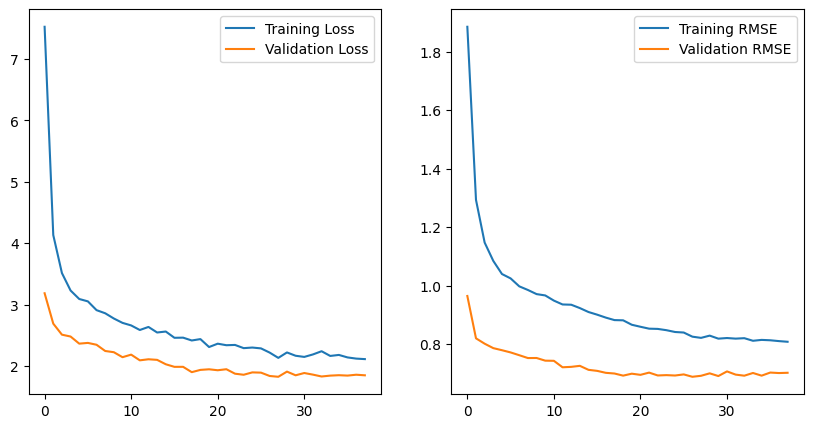

In [39]:
ANN_15 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  keras.layers.BatchNormalization(),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(1)])
ANN_15.compile(optimizer=keras.optimizers.Adam(),loss='mse',metrics=[root_mean_squared_error])
Model_16 = ANN_15.fit(X_scaled,Y_CO,epochs=100,batch_size=128,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])
DF16 = pd.DataFrame(Model_16.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF16['loss'],label='Training Loss')
plt.plot(DF16['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF16['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF16['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

Model 17 with lowering the learning rate

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.2329 - root_mean_squared_error: 2.3667 - val_loss: 4.5089 - val_root_mean_squared_error: 1.3618
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4630 - root_mean_squared_error: 1.6053 - val_loss: 3.1026 - val_root_mean_squared_error: 0.9250
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5152 - root_mean_squared_error: 1.3703 - val_loss: 2.8258 - val_root_mean_squared_error: 0.8406
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9743 - root_mean_squared_error: 1.2625 - val_loss: 2.7082 - val_root_mean_squared_error: 0.8188
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7251 - root_mean_squared_error: 1.2091 - val_loss: 2.5709 - val_root_mean_squared_error: 0.8036
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5327 - root_mean_squared_error: 1.1573 - val_loss: 2.5282 - val_root_mean_squared_error: 0.7959
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2

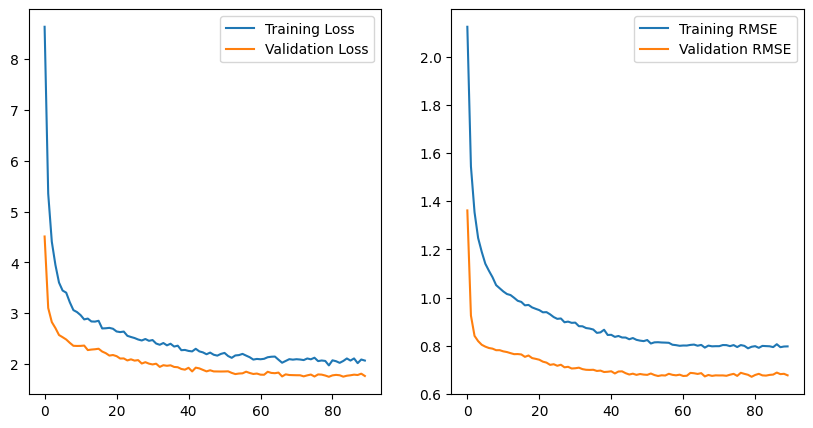

In [19]:
ANN_16 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  keras.layers.BatchNormalization(),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(1)])
ANN_16.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_17 = ANN_16.fit(X_scaled,Y_CO,epochs=100,batch_size=128,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])
DF17 = pd.DataFrame(Model_17.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF17['loss'],label='Training Loss')
plt.plot(DF17['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF17['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF17['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3623 - root_mean_squared_error: 1.1557 - val_loss: 3.4972 - val_root_mean_squared_error: 0.9631
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8868 - root_mean_squared_error: 1.0030 - val_loss: 2.7128 - val_root_mean_squared_error: 0.8397
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8800 - root_mean_squared_error: 0.9461 - val_loss: 2.3545 - val_root_mean_squared_error: 0.7664
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7826 - root_mean_squared_error: 0.9194 - val_loss: 2.2594 - val_root_mean_squared_error: 0.7341
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7337 - root_mean_squared_error: 0.9049 - val_loss: 2.2052 - val_root_mean_squared_error: 0.7283
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4672 - root_mean_squared_error: 0.8859 - val_loss: 2.0708 - val_root_mean_squared_error: 0.7257
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

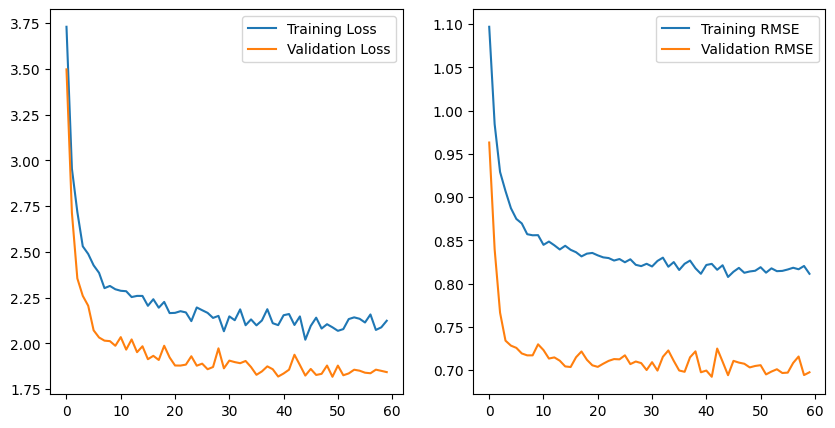

In [21]:
Model_17_Min = ANN_16.fit(X__MinMax_scaked,Y_CO,epochs=100,batch_size=128,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])
DF17_Min = pd.DataFrame(Model_17_Min.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF17_Min['loss'],label='Training Loss')
plt.plot(DF17_Min['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF17_Min['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF17_Min['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

Without Batch Normalization Model 18

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.5414 - root_mean_squared_error: 1.7028 - val_loss: 4.9355 - val_root_mean_squared_error: 1.2091
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7917 - root_mean_squared_error: 1.3447 - val_loss: 4.1849 - val_root_mean_squared_error: 1.1174
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6399 - root_mean_squared_error: 1.2954 - val_loss: 3.9309 - val_root_mean_squared_error: 1.0677
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1652 - root_mean_squared_error: 1.2211 - val_loss: 3.6910 - val_root_mean_squared_error: 1.0410
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6579 - root_mean_squared_error: 1.1815 - val_loss: 3.5208 - val_root_mean_squared_error: 1.0045
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9909 - root_mean_squared_error: 1.1638 - val_loss: 3.3652 - val_root_mean_squared_error: 0.9764
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

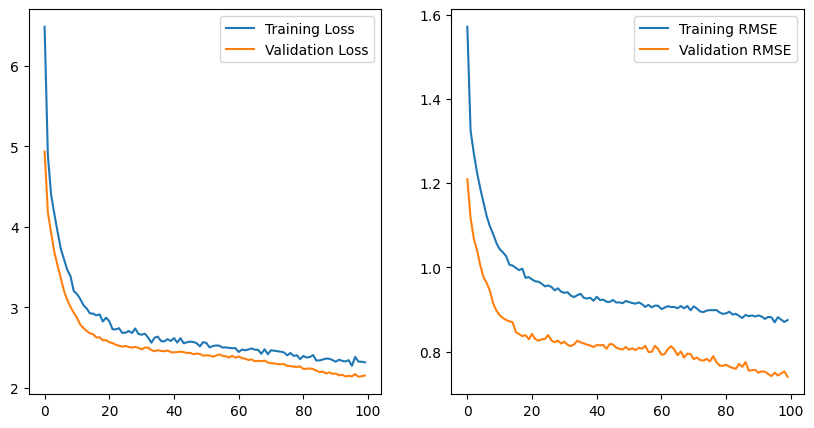

In [19]:
ANN_17 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(1)])
ANN_17.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_18 = ANN_17.fit(X__MinMax_scaked,Y_CO,epochs=100,batch_size=128,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])
DF18 = pd.DataFrame(Model_18.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF18['loss'],label='Training Loss')
plt.plot(DF18['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF18['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF18['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [20]:
ANN_17.evaluate(X_test_MinMax,Y_CO_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 3.2311 - root_mean_squared_error: 0.7875


[2.26393723487854, 0.7437723278999329]

In [22]:
Y_pred_CO = ANN_17.predict(X_test_MinMax)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step


In [23]:
from sklearn.metrics import root_mean_squared_error
RMSE = root_mean_squared_error(Y_CO_test,Y_pred_CO)
print(f" Root Mean Square Error :",{RMSE})

 Root Mean Square Error : {1.4846611662698317}


## Lowering the Epochs

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.3040 - root_mean_squared_error: 1.9713 - val_loss: 4.8854 - val_root_mean_squared_error: 1.2354
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2959 - root_mean_squared_error: 1.4177 - val_loss: 4.0834 - val_root_mean_squared_error: 1.0769
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6435 - root_mean_squared_error: 1.2784 - val_loss: 3.8151 - val_root_mean_squared_error: 1.0554
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8765 - root_mean_squared_error: 1.2405 - val_loss: 3.6516 - val_root_mean_squared_error: 1.0308
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2672 - root_mean_squared_error: 1.2180 - val_loss: 3.5159 - val_root_mean_squared_error: 0.9988
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9538 - root_mean_squared_error: 1.1822 - val_loss: 3.3886 - val_root_mean_squared_error: 0.9782
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

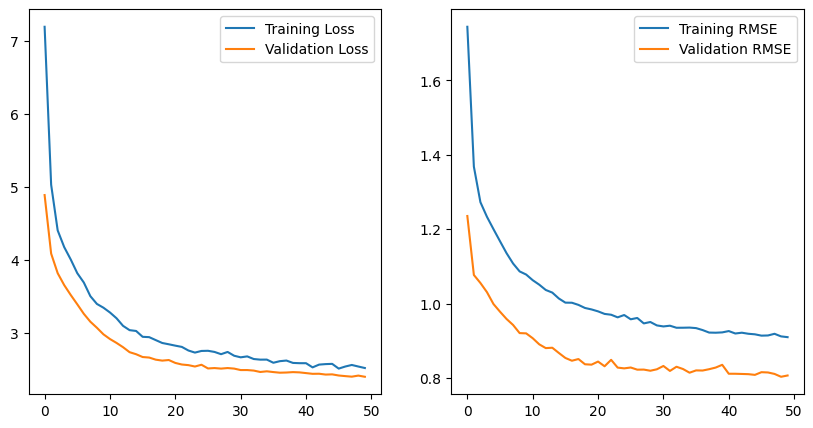

In [23]:
ANN_17 = Sequential([Input(shape=(9,)),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(1)])
ANN_17.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_18 = ANN_17.fit(X__MinMax_scaked,Y_CO,epochs=50,batch_size=128,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])
DF18 = pd.DataFrame(Model_18.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF18['loss'],label='Training Loss')
plt.plot(DF18['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF18['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF18['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [24]:
Y_pred_CO = ANN_17.predict(X_test_MinMax)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step


In [28]:
from sklearn.metrics import root_mean_squared_error
RMSE = root_mean_squared_error(Y_CO_test,Y_pred_CO)
print(f" Root Mean Square Error :",{RMSE})

 Root Mean Square Error : {1.5690314758355328}


Model 16 for NOX

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2801.2190 - root_mean_squared_error: 48.9504 - val_loss: 138.7917 - val_root_mean_squared_error: 9.1958
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 529.8130 - root_mean_squared_error: 18.3953 - val_loss: 111.9000 - val_root_mean_squared_error: 8.0860
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 487.8844 - root_mean_squared_error: 17.5488 - val_loss: 106.0971 - val_root_mean_squared_error: 7.8632
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 472.0000 - root_mean_squared_error: 17.2225 - val_loss: 108.0989 - val_root_mean_squared_error: 7.9433
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 438.0938 - root_mean_squared_error: 16.6655 - val_loss: 105.1857 - val_root_mean_squared_error: 7.8235
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 427.3417 - root_mean_squared_error: 16.3503 - val_loss: 92.1331 - val_root_mean_squared_error: 7.2291
Epoch 7/100
196/

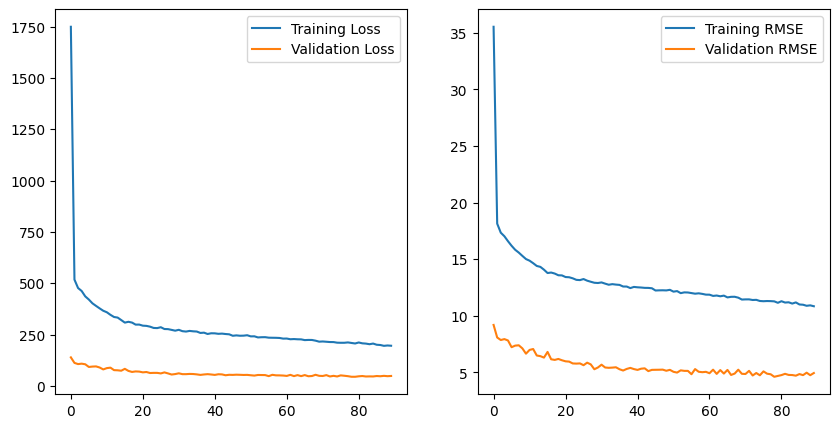

In [40]:
Model_16_NO=ANN_15.fit(X_scaled,Y_NOX,epochs=100,batch_size=128,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(patience=10)])
DF16_NO = pd.DataFrame(Model_16_NO.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF16_NO['loss'],label='Training Loss')
plt.plot(DF16_NO['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF16_NO['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF16_NO['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

# **Making wide and deep network**

In [ ]:
from tensorflow.keras import layers
input = keras.layers.Input(shape=X.shape[1:])
hidden1 = keras.layers.Dense(100, activation="relu")(input)
hidden2 = keras.layers.Dense(50, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
ANN_2 = keras.models.Model(inputs=[input], outputs=[output])

In [ ]:
ANN_2.summary

In [19]:
#optimizer = tf.keras.optimizers.Adam(clipnorm=1.)
#model.compile(optimizer='adam', loss=tf.keras.losses.Huber(delta=1.0), metrics=['mae'])
ANN_2.compile(loss='mse', optimizer='adam',metrics=[root_mean_squared_error])
Model_2 = model.fit((X_scaled), Y_CO, epochs=100, validation_split=0.2, callbacks=[EarlyStopping(patience=10)])

NameError: name 'ANN_2' is not defined

In [ ]:
DF_1 = pd.DataFrame(ANN_first_iter.history)
DF_1

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(DF_1['loss'],label='Training Loss')
plt.plot(DF_1['val_loss'],label='Validation Loss')
plt.plot(DF_1['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF_1['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

##Randomized Search

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[9]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu",**options))
    options={}
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.adam(learning_rate=learning_rate)
  model.compile(loss="mse", optimizer=optimizer,metrics=root_mean_squared_error)
  return model

In [ ]:
# !pip install scikeras

In [ ]:
from scipy.stats import randint, uniform
import scikeras
import scikeras.wrappers
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    "n_neurons": randint(10, 200),         # Number of neurons per layer
    "n_hidden": randint(1, 5),             # Number of hidden layers
    "learning_rate": uniform(0.0001, 0.1), # Learning rate
    "optimizer": ["adam", "sgd"],          # Optimizer type
    "epochs": [50, 100, 200],              # Number of epochs
    "batch_size": [8, 16, 32, 64]          # Batch size
}

In [ ]:
reg_model =scikeras.wrappers.KerasRegressor(build_model)

In [ ]:
rnd_search_cv = RandomizedSearchCV(reg_model, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_scaled, Y_CO, epochs=100,
  validation_split=0.2,
  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

AttributeError: 'super' object has no attribute '__sklearn_tags__'